In [5]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Constants
input_shape = (224, 224, 3)
num_classes = 9
batch_size = 32
epochs = 5
data_dir = 'VGG_Spectograms/'

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # Splitting 80% for training, 20% for testing

# Load and preprocess data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  # Set as training data
    seed=42,  # Random seed for reproducibility
    shuffle=True)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  # Set as validation data
    seed=42,  # Same random seed as training data
    shuffle=True)

# Sanity check to ensure that the class indices are consistent
assert train_generator.class_indices == validation_generator.class_indices

# Load pre-trained InceptionV3 model without top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Add global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(512, activation='relu')(x)

# Add a dropout layer
x = Dropout(0.5)(x)

# Add a final softmax layer
predictions = Dense(num_classes, activation='softmax')(x)

# This is the model we will train
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define the filepath to save the best model
model_checkpoint = ModelCheckpoint(filepath='best_inception_model.keras', 
                                   monitor='val_accuracy', 
                                   save_best_only=True, 
                                   mode='max', 
                                   verbose=1)

# Train the model with the ModelCheckpoint callback
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[model_checkpoint])

# Load the best model
best_model = load_model('best_inception_model.keras')

# Evaluate the best model
loss, accuracy = best_model.evaluate(validation_generator)
print("Best Validation Accuracy:", accuracy)


Found 1155 images belonging to 9 classes.
Found 285 images belonging to 9 classes.
Epoch 1/5


/home/karthik/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-04-30 21:55:29.788160: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19267584 exceeds 10% of free system memory.
2024-04-30 21:55:30.652991: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19267584 exceeds 10% of free system memory.
2024-04-30 21:55:31.513667: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19267584 exceeds 10% of free system memory.
2024-04-30 21:55:31.946742: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19267584 exceeds 10% of free system memory.
2024-04-30 21:55:32.389413:

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1267 - loss: 2.3647
Epoch 1: val_accuracy improved from -inf to 0.12891, saving model to best_inception_model.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 224s 5s/step - accuracy: 0.1267 - loss: 2.3610 - val_accuracy: 0.1289 - val_loss: 3913.4795
Epoch 2/5
 1/36 ━━━━━━━━━━━━━━━━━━━━ 3:03 5s/step - accuracy: 0.1250 - loss: 2.1636

2024-04-30 21:58:51.162299: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/karthik/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy improved from 0.12891 to 0.13793, saving model to best_inception_model.keras


2024-04-30 21:58:51.968921: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.1250 - loss: 2.1636 - val_accuracy: 0.1379 - val_loss: 3121.7727
Epoch 3/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1294 - loss: 2.1319
Epoch 3: val_accuracy did not improve from 0.13793
36/36 ━━━━━━━━━━━━━━━━━━━━ 194s 5s/step - accuracy: 0.1294 - loss: 2.1320 - val_accuracy: 0.1328 - val_loss: 1169.5652
Epoch 4/5
 1/36 ━━━━━━━━━━━━━━━━━━━━ 3:01 5s/step - accuracy: 0.1875 - loss: 2.1938

2024-04-30 22:02:12.101237: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 4: val_accuracy did not improve from 0.13793
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.1875 - loss: 2.1938 - val_accuracy: 0.1379 - val_loss: 1261.9709
Epoch 5/5


2024-04-30 22:02:12.896245: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1373 - loss: 2.1174
Epoch 5: val_accuracy improved from 0.13793 to 0.14453, saving model to best_inception_model.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 191s 5s/step - accuracy: 0.1373 - loss: 2.1171 - val_accuracy: 0.1445 - val_loss: 3.0764
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 977ms/step - accuracy: 0.1500 - loss: 3.1359
Best Validation Accuracy: 0.13684210181236267


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Emotion Label: 7


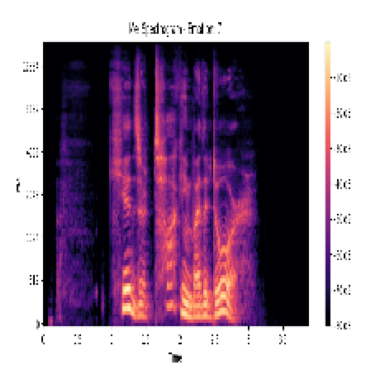

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the spectrogram image
img_path = 'VGG_Spectograms/7/03-01-07-01-01-01-01.png'  # Replace with the path to your spectrogram image
img = image.load_img(img_path, target_size=input_shape[:2])
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the batch size

# Preprocess the image
img_array /= 255.0  # Normalize pixel values

# Load the best model
best_model = load_model('best_inception_model.keras')

# Use the model to predict the emotion label
predictions = best_model.predict(img_array)

# Get the predicted emotion label
emotion_label = np.argmax(predictions)

# Print the predicted emotion label
print("Predicted Emotion Label:", emotion_label)

# Display the spectrogram image
plt.imshow(img)
plt.axis('off')
plt.show()
